In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
data.shape

(48895, 16)

In [3]:
#data.groupby('host_id').count().max()

In [4]:
#neighbourhood_group to first

data['id'] = data.index
data = data.set_index('neighbourhood_group')
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Brooklyn,0,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
Manhattan,1,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
Manhattan,2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
Brooklyn,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
Manhattan,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 設定Matplotlib樣式

In [5]:
# 可使用的樣式
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
#設定樣式
plt.style.use('Solarize_Light2')

## 哪個區域的案件最多

In [7]:
data.groupby('neighbourhood_group').size()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

In [8]:
data.groupby('neighbourhood').size()

neighbourhood
Allerton            42
Arden Heights        4
Arrochar            21
Arverne             77
Astoria            900
                  ... 
Windsor Terrace    157
Woodhaven           88
Woodlawn            11
Woodrow              1
Woodside           235
Length: 221, dtype: int64

In [9]:
# sns.countplot(x='neighbourhood_group', data=data)

# plt.xlabel('Zone')
# plt.ylabel('Case Number')

## 哪個區域的平均價格最高

In [10]:
#NG_price_s = data.groupby(by=['neighbourhood_group'])['price'].sum() 
#NG_price_c = data.groupby(by=['neighbourhood_group'])['price'].count() 
#NG_price = NG_price_s / NG_price_c

#same as
#data.groupby('neighbourhood_group')['price'].mean()
data.groupby('neighbourhood_group')['price'].mean().reset_index()  #reset_index()製成表格

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


Text(0, 0.5, 'Avg Price')

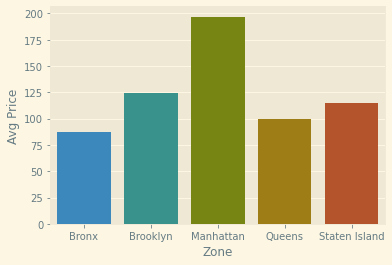

In [11]:
# 如何把輸出資料作圖 Ans

sns.barplot(x='neighbourhood_group', 
            y='price',
            data=data.groupby('neighbourhood_group')['price'].mean().reset_index())

plt.xlabel('Zone')
plt.ylabel('Avg Price')

## 畫出不同區域各種房型的平均價格

In [12]:
# 如何做 區域/房型/價格的總和 （三位）Ans

avg_price = data.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_price 

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


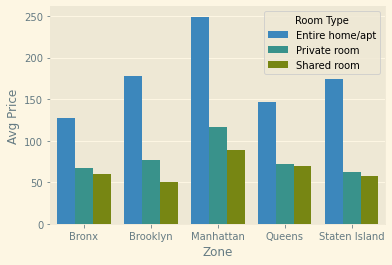

In [13]:
sns.barplot(x='neighbourhood_group', 
            y='price', 
            hue='room_type',
            data=avg_price )

plt.xlabel('Zone')
plt.ylabel('Avg Price')
plt.legend(title='Room Type')

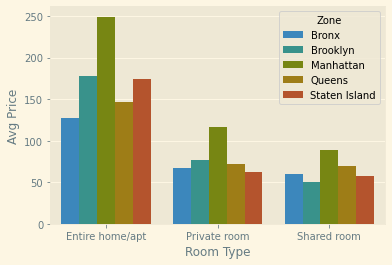

In [14]:
sns.barplot(x='room_type', 
            y='price', 
            hue='neighbourhood_group',
            data=data.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index())

plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.legend(title='Zone')

## 擁有房間數目最多的前10名房東

In [15]:
# 不知道為何不能這樣用 會 merge 不到資料
# -> 
data_index = data['host_id'].value_counts().head(3).reset_index()
data_index

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121


In [16]:
#data_index = data.groupby('host_id').size().sort_values(ascending=False).head(3).reset_index()
#data_index

In [17]:
# 不知道如何把 host_id 

# pd.merge(data_index,
#         data,
#         on='host_id')

# same host_id dropout
pd.merge(data_index,
         data[['host_id','host_name']].drop_duplicates('host_id'),
         on='host_id')

,index,host_id,host_name


## 擁有房間租金總額最多的前10名房東

In [18]:
data_index = data.groupby('host_id')['price'].sum().sort_values(ascending=False).head(10).reset_index()
data_index

,host_id,price
0,219517861,82795
1,107434423,70331
2,156158778,37097
3,205031545,35294
4,30283594,33581
5,12243051,20451
6,16098958,20060
7,836168,19500
8,200380610,18865
9,3750764,18780


In [19]:
pd.merge(data_index,data[['host_id','host_name']].drop_duplicates('host_id'),
         on='host_id')

,host_id,price,host_name
0,219517861,82795,Sonder (NYC)
1,107434423,70331,Blueground
2,156158778,37097,Sally
3,205031545,35294,Red Awning
4,30283594,33581,Kara
5,12243051,20451,Sonder
6,16098958,20060,Jeremy & Laura
7,836168,19500,Henry
8,200380610,18865,Pranjal
9,3750764,18780,Kevin


## 那個區域比較熱門

In [20]:
data.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()

,neighbourhood_group,number_of_reviews
0,Brooklyn,486574
1,Manhattan,454569
2,Queens,156950
3,Bronx,28371
4,Staten Island,11541


In [21]:
data.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(10).reset_index()

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352
1,Williamsburg,85427
2,Harlem,75962
3,Bushwick,52514
4,Hell's Kitchen,50227
5,East Village,44670
6,East Harlem,36446
7,Crown Heights,36408
8,Upper West Side,36058
9,Upper East Side,31686


In [22]:
subData = data.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews']\
    .sum().sort_values(ascending=False).head(10).reset_index()
subData

,neighbourhood_group,neighbourhood,number_of_reviews
0,Brooklyn,Bedford-Stuyvesant,110352
1,Brooklyn,Williamsburg,85427
2,Manhattan,Harlem,75962
3,Brooklyn,Bushwick,52514
4,Manhattan,Hell's Kitchen,50227
5,Manhattan,East Village,44670
6,Manhattan,East Harlem,36446
7,Brooklyn,Crown Heights,36408
8,Manhattan,Upper West Side,36058
9,Manhattan,Upper East Side,31686


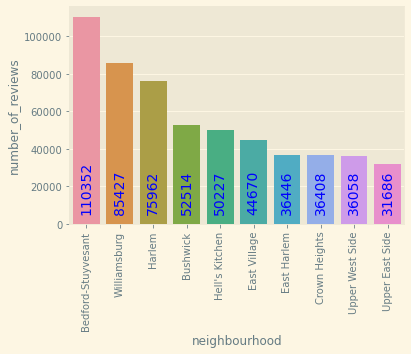

In [23]:
g = sns.barplot(data=subData,
                x='neighbourhood',
                y='number_of_reviews')

plt.xticks(rotation=90)
i = 0
for value in subData['number_of_reviews'].values:
    g.text(i, 7000, 
           value, 
           color='#0000FF', size=14, rotation= 90, ha="center")
    i += 1
    

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

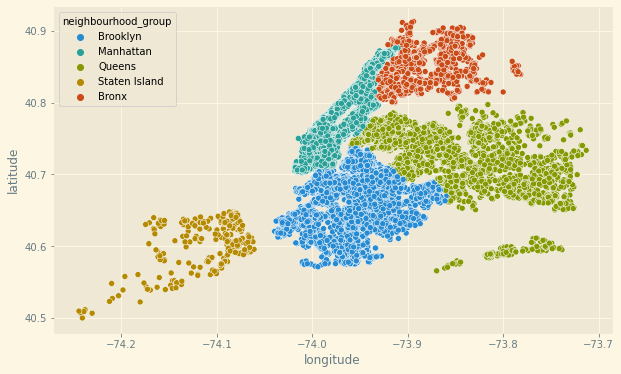

In [24]:
data = pd.read_csv("data/AB_NYC_2019.csv")



plt.figure(figsize=(10,6))
sns.scatterplot(x=data.longitude,
                y=data.latitude,
                hue=data.neighbourhood_group)

## 地理圖

## == Folium == 

#pip install folium
https://python-visualization.github.io/folium/


In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
#pip install folium

import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,- 73.9160],  #define a location
             zoom_start=11)       #zoom more

HeatMap(data[['latitude','longitude']].dropna(),
        radius=8,
        gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [27]:
import folium
from folium.plugins import HeatMap
d = data.head(100)
m=folium.Map([40.7128,-74.0060],zoom_start=11)
for index, row in d.iterrows():
    folium.Marker(row[['latitude','longitude']], popup=row['price']).add_to(m)
display(m)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import folium
from folium import plugins
d = data.head(10000)
m=folium.Map([40.7128,-74.0060],zoom_start=11)
mc=plugins.MarkerCluster().add_to(m)
for index, row in d.iterrows():
    folium.Marker(row[['latitude','longitude']], popup=row['price']).add_to(mc)
display(m)

## == sns.displot ==
#pip install seaborn

In [ ]:
pip install --upgrade seaborn

In [ ]:
# import seaborn as sns
# sns.displot(data[data['price']<2000],
#             x='price',
#             hue='neighbourhood_group',
#             bins=20)

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()